In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/hr_employee_churn_data.csv')
data

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [ ]:
data.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [ ]:
data.isna().any()

empid                    False
satisfaction_level        True
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
salary                   False
left                     False
dtype: bool

In [ ]:
data.isna().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [ ]:
data.isna().any().sum()

1

In [ ]:
data[data['satisfaction_level'].notnull()]

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [ ]:
df=pd.DataFrame(data)

In [ ]:
data= df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [ ]:
pd.get_dummies(data['salary'])

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
salary_data = pd.get_dummies(data['salary'], drop_first = True)

In [ ]:
data= pd.concat([data, salary_data], axis = 1)
data

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,1,0.38,0.53,2,157,3,0,0,low,1,1,0
1,2,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,3,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,4,0.72,0.87,5,223,5,0,0,low,1,1,0
4,5,0.37,0.52,2,159,3,0,0,low,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1,1,0
14995,14996,0.37,0.48,2,160,3,0,0,low,1,1,0
14996,14997,0.37,0.53,2,143,3,0,0,low,1,1,0
14997,14998,0.11,0.96,6,280,4,0,0,low,1,1,0


In [ ]:
data.isna().sum()

empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
low                      0
medium                   0
dtype: int64

In [ ]:
y=pd.DataFrame(data['left'])
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [ ]:
data.drop(['left','salary'],axis=1,inplace=True)
data

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,1,0.38,0.53,2,157,3,0,0,1,0
1,2,0.80,0.86,5,262,6,0,0,0,1
2,3,0.11,0.88,7,272,4,0,0,0,1
3,4,0.72,0.87,5,223,5,0,0,1,0
4,5,0.37,0.52,2,159,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,1,0
14995,14996,0.37,0.48,2,160,3,0,0,1,0
14996,14997,0.37,0.53,2,143,3,0,0,1,0
14997,14998,0.11,0.96,6,280,4,0,0,1,0


In [ ]:
x=data

In [ ]:
x.isna().sum()

empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
low                      0
medium                   0
dtype: int64

In [ ]:
x.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Length: 14997, dtype: bool

In [ ]:
#x.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

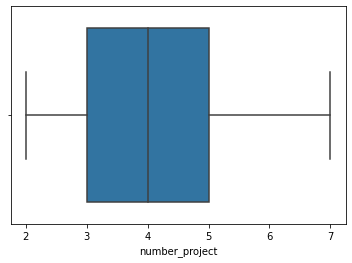

In [ ]:
import seaborn as sns
sns.boxplot(x=x['number_project'])

no outliers

In [ ]:
data.describe()


,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,7500.998733,0.612863,0.716128,3.803294,201.057411,3.498300,0.144629,0.021271,0.487698,0.429819
std,4329.407522,0.248634,0.171165,1.232499,49.942638,1.460222,0.351738,0.144291,0.499865,0.495067
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,3752.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,7501.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,11250.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,1.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['number_project'].value_counts()


4    4365
3    4055
5    2761
2    2386
6    1174
7     256
Name: number_project, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle =True)

In [ ]:
X_train.shape , X_test.shape ,y_test.shape,y_train.shape

((11997, 10), (3000, 10), (3000, 1), (11997, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
#predicting data
y_p=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('LogisticRegression Train Score is : ' , model.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , model.score(X_test, y_test))

LogisticRegression Train Score is :  0.8029507376844212
LogisticRegression Test Score is :  0.7963333333333333
